<a href="https://colab.research.google.com/github/mmovahed/UDLbook_ResNet/blob/main/ResNet_Volterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
32/32 [==============================] - 10s 6ms/step - loss: 54.2066
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6585
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2566
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1293
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1009
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0963
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0991
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0925
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0907
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0882
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0844
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0842
Epoch 13/100
32/32 [===============

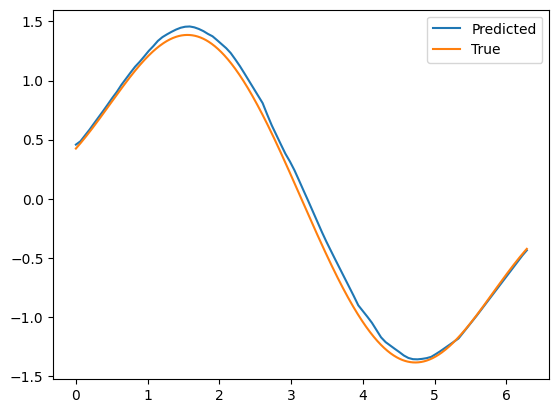

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the Volterra integral equation to be solved
def f(x):
    return np.sin(x)

def kernel(x, t):
    return np.exp(-(x-t)**2)

# Generate training data
X_train = np.linspace(0, 2*np.pi, 1000)
y_train = np.array([np.trapz(kernel(x, X_train)*f(X_train), X_train) for x in X_train])

# Reshape the input data
X_train = X_train.reshape(-1, 1)

# Define the residual block
def residual_block(input_layer, units):
    x = keras.layers.Dense(units, activation='relu')(input_layer)
    x = keras.layers.Dense(units, activation='relu')(x)
    x = keras.layers.Dense(units, activation='relu')(x)
    return keras.layers.add([input_layer, x])

# Build the residual neural network model
inputs = keras.layers.Input(shape=(1,))
x = keras.layers.Dense(10, activation='relu')(inputs)
for _ in range(10):
    x = residual_block(x, 10)
outputs = keras.layers.Dense(1)(x)

model = keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Generate test data
X_test = np.linspace(0, 2*np.pi, 100)
X_test = X_test.reshape(-1, 1)

# Make predictions
predictions = model.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(X_test, predictions, label='Predicted')
plt.plot(X_train, y_train, label='True')
plt.legend()
plt.show()